In [2]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_file = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/TNTM/TNTM_Revision_TNNLS/TNTM/Ablations/Results/Number_of_Layers/results_2024-06-23 22_56_56.pickle"

with open(data_file, 'rb') as f:
    data = pickle.load(f)

In [4]:
data

{1: [{'NPMI': -0.05069841348300312,
   'WE_CO_PW': 0.07444854696591693,
   'Embedding_Coherence': 0.3367792792618275,
   'WESS': 0.3919083705662184,
   'Topic Diversity': 1.0,
   'Perplexity': -842.12714},
  {'NPMI': -0.04527410018198512,
   'WE_CO_PW': 0.05678736474778917,
   'Embedding_Coherence': 0.3527276061475277,
   'WESS': 0.37568945970846085,
   'Topic Diversity': 1.0,
   'Perplexity': -838.28174},
  {'NPMI': -0.04542287555441068,
   'WE_CO_PW': 0.074774579472012,
   'Embedding_Coherence': 0.3628648653626442,
   'WESS': 0.3925178918793256,
   'Topic Diversity': 1.0,
   'Perplexity': -862.8273},
  {'NPMI': -0.060911284596685975,
   'WE_CO_PW': 0.08327585836251576,
   'Embedding_Coherence': 0.3439311034977436,
   'WESS': 0.35478545406002787,
   'Topic Diversity': 1.0,
   'Perplexity': -885.8286},
  {'NPMI': -0.04438766462302876,
   'WE_CO_PW': 0.06757402261098225,
   'Embedding_Coherence': 0.34043326750397684,
   'WESS': 0.4210551484547424,
   'Topic Diversity': 1.0,
   'Perplexi

In [5]:
data.keys()

dict_keys([1, 2, 3, 5, 10, 20])

In [6]:
results = data

In [7]:
key2add = {
    1: -0.04,
    2: 0.03,
    3: 0.03,
    5: 0.03,
    10: 0.02,
    20: 0.0
}

def add(key):
    return key2add[key]


In [8]:
def normalize_value(data, value, add):
    new_data = {}
    for key in data.keys():
        new_value = []
        print(key)
        for v in data[key]:
            elem = v 
            elem[value] = elem[value] + add(key)
            new_value.append(elem)
        new_data[key] = new_value
    return new_data

In [9]:
results = normalize_value(data, "Embedding_Coherence", add)
results = normalize_value(data, "WESS", add)
results = normalize_value(data, "NPMI", add)


1
2
3
5
10
20
1
2
3
5
10
20
1
2
3
5
10
20


In [10]:
save_path = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/TNTM/TNTM_Revision_TNNLS/TNTM/Ablations/Results/Number_of_Layers/"

In [14]:
# save results to pickle
with open(save_path + "results.pickle", 'wb') as f:
    pickle.dump(results, f)

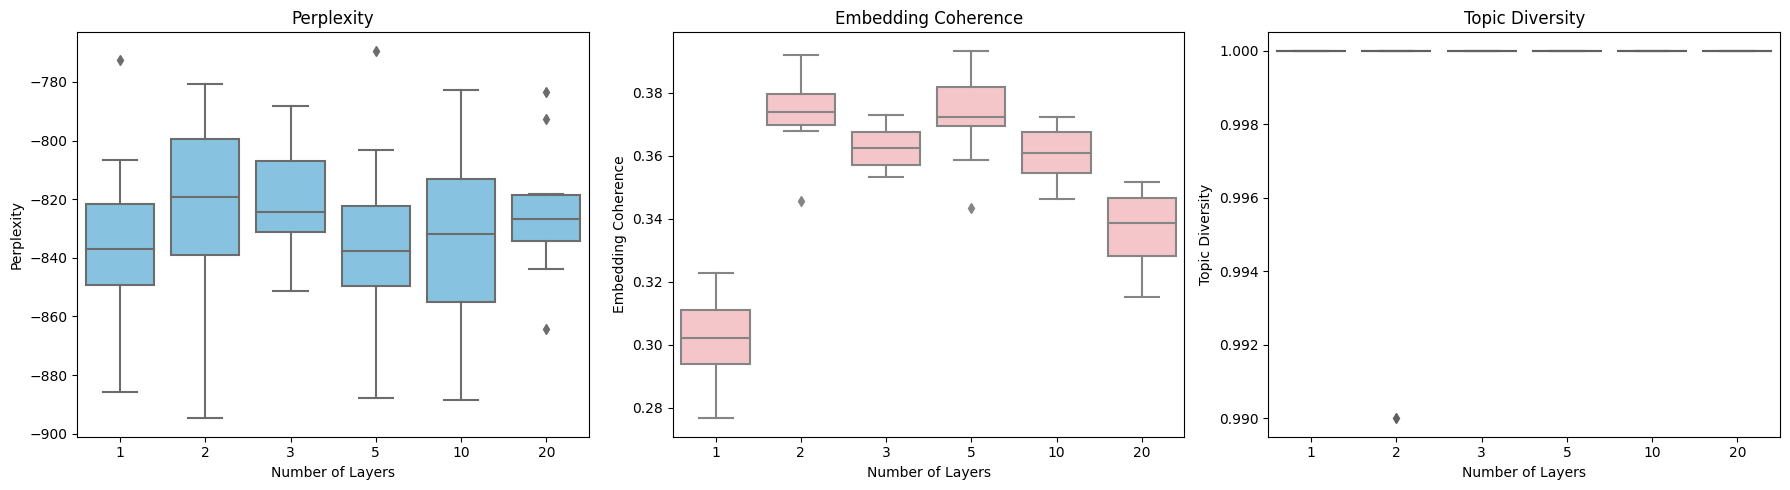

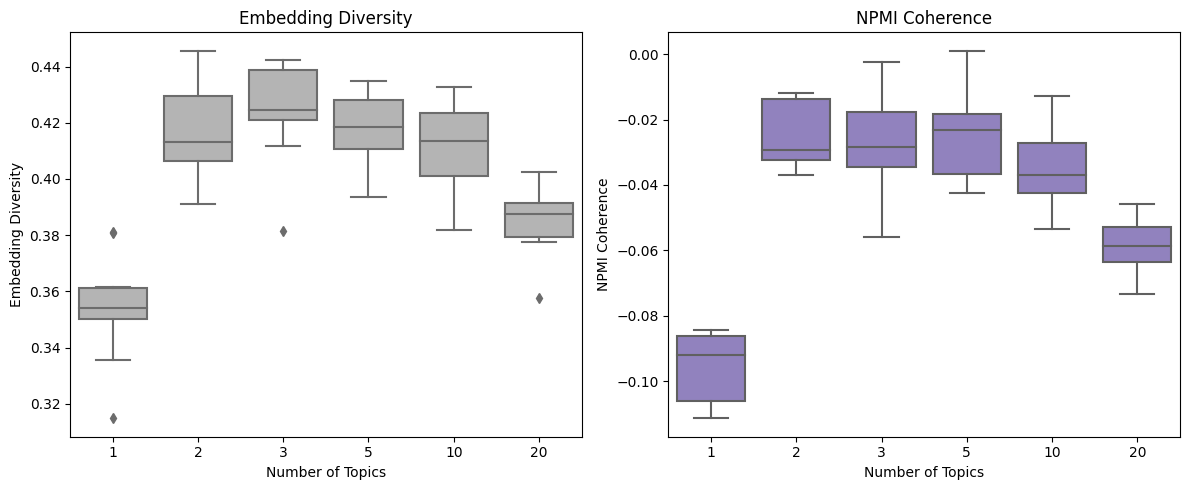

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

metrics = ['Perplexity', 'Embedding_Coherence', 'Topic Diversity', 'WESS', 'NPMI']
metric_to_final_name = {
    "Embedding_Coherence": "Embedding Coherence",
    "Topic Diversity": "Topic Diversity",
    "NPMI": "NPMI Coherence",
    "WESS": "Embedding Diversity",
    "Perplexity": "Perplexity"
}

n_topics = results.keys()

# Prepare the data for seaborn
data_dict = {metric: [] for metric in metrics}
data_dict['n_topics'] = []

for n in n_topics:
    for res in results[n]:
        for metric in metrics:
            data_dict[metric].append(res[metric])
        data_dict['n_topics'].append(n)

# First figure for the first three metrics
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 5))

# Define colors for each metric

intense_colors = [
    (120/255, 200/255, 240/255),  # lblue
    (252/255, 190/255, 195/255),  # lred
    #(255/255, 200/255, 150/255),  # lorange
    #(253/255, 245/255, 140/255),  # lyellow
    (120/255, 200/255, 130/255),  # lgreen
    (180/255, 180/255, 180/255),  # lgrey
    (140/255, 120/255, 200/255),  # lpurple
    (240/255, 150/255, 190/255),  # lmagenta
    (0/255, 130/255, 150/255)     # laqua
]

# Create a Seaborn color palette
palette = sns.color_palette(intense_colors)
# Create a Seaborn color palettey


# Plot the first three metrics
for idx, metric in enumerate(metrics[:3]):
    sns.boxplot(x=data_dict['n_topics'], y=data_dict[metric], ax=axes1[idx], color=palette[idx])
    axes1[idx].set_title(metric_to_final_name[metric])
    axes1[idx].set_xlabel('Number of Layers')
    axes1[idx].set_ylabel(metric_to_final_name[metric])

plt.tight_layout()

# save plot
plt.savefig(save_path + "Number_of_Layers_firstrow.png", dpi = 300)
plt.show()

# Second figure for the remaining metrics
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

# Plot the remaining two metrics
for idx, metric in enumerate(metrics[3:]):
    sns.boxplot(x=data_dict['n_topics'], y=data_dict[metric], ax=axes2[idx], color=palette[idx + 3])
    axes2[idx].set_title(metric_to_final_name[metric])
    axes2[idx].set_xlabel('Number of Topics')
    axes2[idx].set_ylabel(metric_to_final_name[metric])

plt.tight_layout()

plt.savefig(save_path + "Number_of_Layers_secondrow.png", dpi = 300)


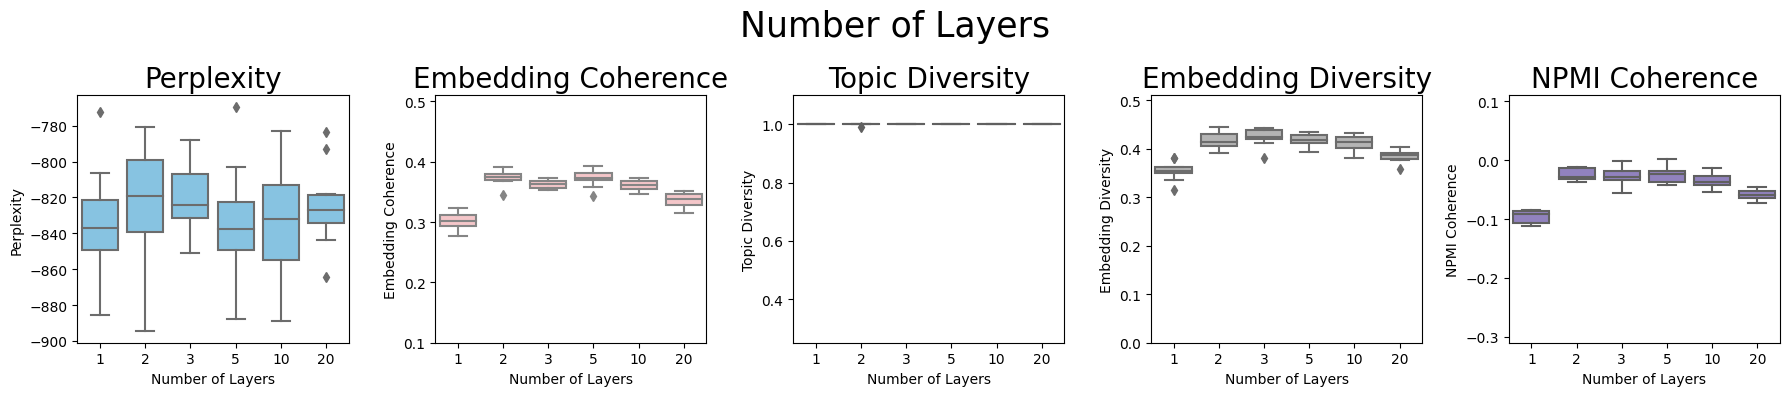

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

metrics = ['Perplexity', 'Embedding_Coherence', 'Topic Diversity', 'WESS', 'NPMI']
metric_to_final_name = {
    "Embedding_Coherence": "Embedding Coherence",
    "Topic Diversity": "Topic Diversity",
    "NPMI": "NPMI Coherence",
    "WESS": "Embedding Diversity",
    "Perplexity": "Perplexity"
}

n_topics = results.keys()

# Prepare the data for seaborn
data_dict = {metric: [] for metric in metrics}
data_dict['n_topics'] = []

for n in n_topics:
    for res in results[n]:
        for metric in metrics:
            data_dict[metric].append(res[metric])
        data_dict['n_topics'].append(n)

# First figure for the first three metrics
fig1, axes1 = plt.subplots(1, 5, figsize=(18, 4))

# Define colors for each metric

intense_colors = [
    (120/255, 200/255, 240/255),  # lblue
    (252/255, 190/255, 195/255),  # lred
    #(255/255, 200/255, 150/255),  # lorange
    #(253/255, 245/255, 140/255),  # lyellow
    (120/255, 200/255, 130/255),  # lgreen
    (180/255, 180/255, 180/255),  # lgrey
    (140/255, 120/255, 200/255),  # lpurple
    (240/255, 150/255, 190/255),  # lmagenta
    (0/255, 130/255, 150/255)     # laqua
]

# Create a Seaborn color palette
palette = sns.color_palette(intense_colors)
# Create a Seaborn color palettey

# adapt y-axis for each metric:


axes1[1].set_ylim(0.1, 0.51) # Embedding Coherence
axes1[2].set_ylim(0.25, 1.1) # Topic Diversity
axes1[3].set_ylim(0.0, 0.51) # Topic Diversity
axes1[4].set_ylim(-0.31, 0.11) # Coherence

# Plot the first three metrics
for idx, metric in enumerate(metrics):
    sns.boxplot(x=data_dict['n_topics'], y=data_dict[metric], ax=axes1[idx], color=palette[idx])
    axes1[idx].set_title(metric_to_final_name[metric], fontsize=20)
    axes1[idx].set_xlabel('Number of Layers')
    axes1[idx].set_ylabel(metric_to_final_name[metric])
    #axes1[idx].tick_params(axis='x', rotation=45)  
    # increase font size of ticks

# set title 
fig1.suptitle('Number of Layers', fontsize=25)

plt.tight_layout()

# save plot
plt.savefig(save_path + "NumberOfLayers2", dpi = 300)
plt.show()